# Research Question
How do specific health conditions impact healthcare-related observations (e.g., symptoms, behavior, employment status), and are these patterns influenced by patient demographics such as age and race?

### Loading Libraries

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

### Loading Datasets

In [3]:
patients_df = pd.read_csv("patients.csv")
observations_df = pd.read_csv("observations.csv")
conditions_df = pd.read_csv("conditions.csv")

### Understanding Datasets

#### patients_df

In [7]:
patients_df.shape

(1163, 25)

In [11]:
list(patients_df.columns.values)

['Id',
 'BIRTHDATE',
 'DEATHDATE',
 'SSN',
 'DRIVERS',
 'PASSPORT',
 'PREFIX',
 'FIRST',
 'LAST',
 'SUFFIX',
 'MAIDEN',
 'MARITAL',
 'RACE',
 'ETHNICITY',
 'GENDER',
 'BIRTHPLACE',
 'ADDRESS',
 'CITY',
 'STATE',
 'COUNTY',
 'ZIP',
 'LAT',
 'LON',
 'HEALTHCARE_EXPENSES',
 'HEALTHCARE_COVERAGE']

In [15]:
unique_ID_count = patients_df['Id'].nunique()
print("Number of unique Ids:", unique_ID_count)

Number of unique Ids: 1163


In [25]:
pat_duplicates = patients_df[patients_df.duplicated()]
pat_num_duplicates = patients_df.duplicated().sum()
print(f"Number of duplicates: {pat_num_duplicates}")

Number of duplicates: 0


In [30]:
# Number of missing values
patients_df.isnull().sum()

Id                        0
BIRTHDATE                 0
DEATHDATE              1000
SSN                       0
DRIVERS                 215
PASSPORT                276
PREFIX                  245
FIRST                     0
LAST                      0
SUFFIX                 1147
MAIDEN                  832
MARITAL                 384
RACE                      0
ETHNICITY                 0
GENDER                    0
BIRTHPLACE                0
ADDRESS                   0
CITY                      0
STATE                     0
COUNTY                    0
ZIP                     545
LAT                       0
LON                       0
HEALTHCARE_EXPENSES       0
HEALTHCARE_COVERAGE       0
dtype: int64

Is there a correlation among the features?

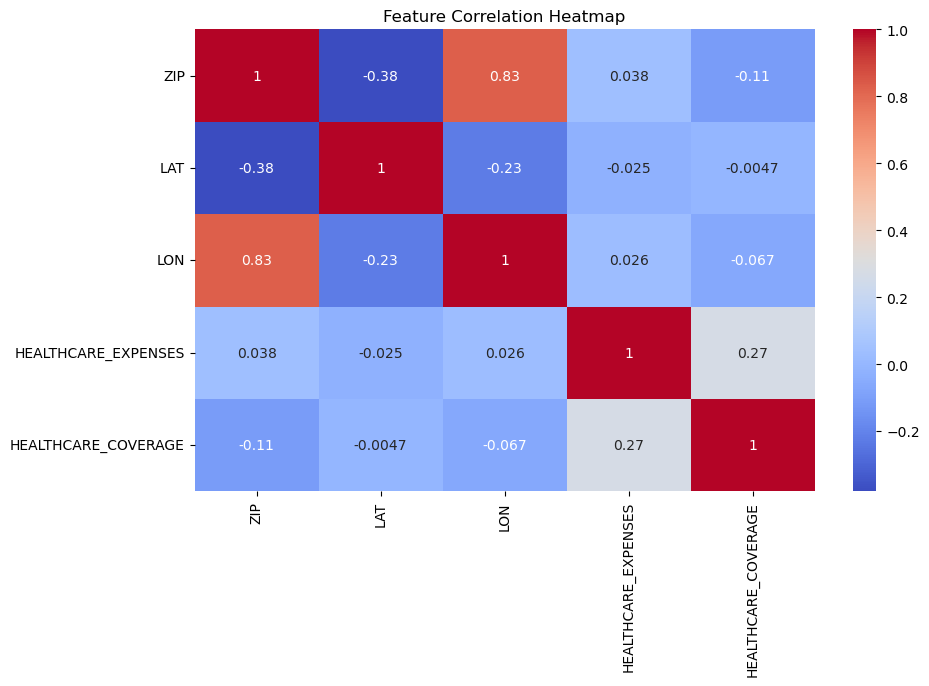

In [37]:
numeric_df = patients_df.select_dtypes(include='number')

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

Can we see any linear relationships between the features?

In [76]:
patients_df = pd.read_csv("patients.csv")

patients_df['BIRTHDATE'] = pd.to_datetime(patients_df['BIRTHDATE'], errors='coerce')
patients_df['DEATHDATE'] = pd.to_datetime(patients_df['DEATHDATE'], errors='coerce')
today = pd.to_datetime("today")

patients_df['AGE'] = (
    (patients_df['DEATHDATE'].fillna(today) - patients_df['BIRTHDATE'])
    .dt.days // 365
)

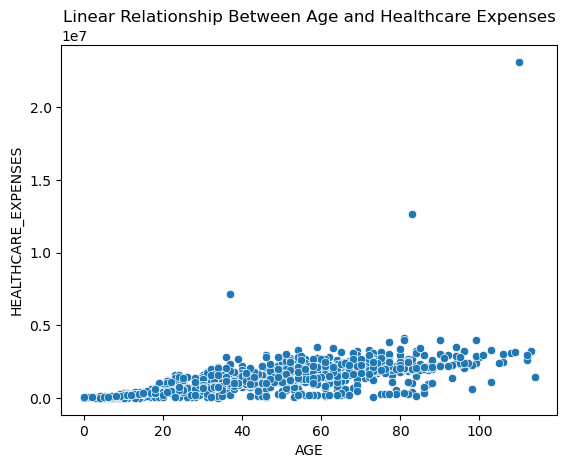

In [77]:
sns.scatterplot(data=patients_df, x='AGE', y='HEALTHCARE_EXPENSES')
plt.title('Linear Relationship Between Age and Healthcare Expenses')
plt.show()

Are there any outliers?

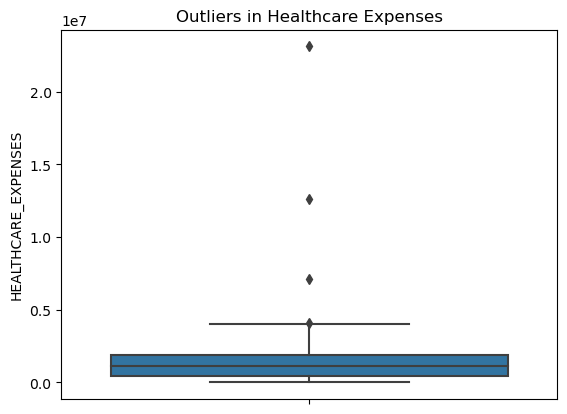

In [54]:
sns.boxplot(data=patients_df, y='HEALTHCARE_EXPENSES')
plt.title('Outliers in Healthcare Expenses')
plt.show()

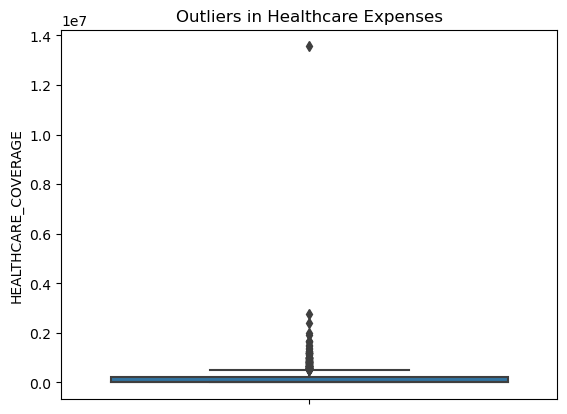

In [57]:
sns.boxplot(data=patients_df, y='HEALTHCARE_COVERAGE')
plt.title('Outliers in Healthcare Expenses')
plt.show()

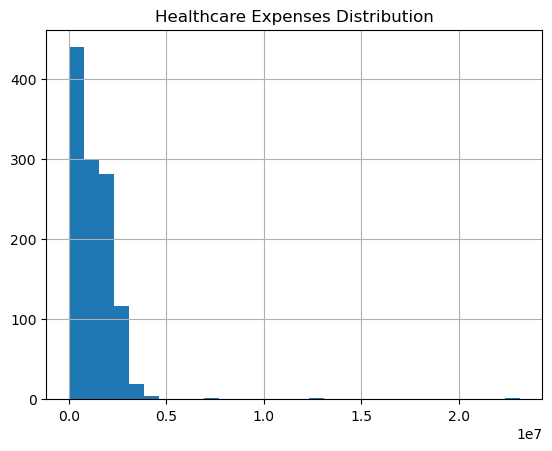

In [60]:
patients_df['HEALTHCARE_EXPENSES'].hist(bins=30)
plt.title('Healthcare Expenses Distribution')
plt.show()

#### observations_df

In [8]:
observations_df.shape

(531144, 9)

In [12]:
list(observations_df.columns.values)

['DATE',
 'PATIENT',
 'ENCOUNTER',
 'CATEGORY',
 'CODE',
 'DESCRIPTION',
 'VALUE',
 'UNITS',
 'TYPE']

In [21]:
unique_ID_obs = observations_df['PATIENT'].nunique()
print("Number of unique Ids:", unique_ID_obs)

Number of unique Ids: 1163


Okay as you can see the the number of rows from 'shape' are different than the number of unique values there are in the dataset. This indicates the possibility of duplicates so let's check.

In [27]:
duplicates = observations_df[observations_df.duplicated()]
num_duplicates = observations_df.duplicated().sum()
print(f"Number of duplicates: {num_duplicates}")

Number of duplicates: 249


In [32]:
observations_df.isnull().sum()

DATE                0
PATIENT             0
ENCOUNTER       31662
CATEGORY        31662
CODE                0
DESCRIPTION         0
VALUE               0
UNITS          185017
TYPE                0
dtype: int64

#### conditions_df

In [10]:
conditions_df.shape

(38094, 6)

In [13]:
list(conditions_df.columns.values)

['START', 'STOP', 'PATIENT', 'ENCOUNTER', 'CODE', 'DESCRIPTION']

In [23]:
unique_ID_cond = conditions_df['PATIENT'].nunique()
print("Number of unique Ids:", unique_ID_cond)

Number of unique Ids: 1147


In [26]:
cond_duplicates = conditions_df[conditions_df.duplicated()]
cond_num_duplicates = conditions_df.duplicated().sum()
print(f"Number of duplicates: {cond_num_duplicates}")

Number of duplicates: 0


In [33]:
conditions_df.isnull().sum()

START             0
STOP           8169
PATIENT           0
ENCOUNTER         0
CODE              0
DESCRIPTION       0
dtype: int64

### Data Cleaning

Let's first drop unnecessary features.

In [79]:
patients_df = patients_df[[
    'Id', 'RACE', 'GENDER', 'ETHNICITY',
    'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE', 'AGE'
]]

In [88]:
observations_df = pd.read_csv('observations.csv')

In [89]:
observations_df = observations_df[['PATIENT', 'DESCRIPTION', 'VALUE', 'TYPE', 'CATEGORY']]

In [90]:
conditions_df = conditions_df[['PATIENT', 'DESCRIPTION', 'START']]

In [91]:
duplicates_observations = observations_df.duplicated().sum()

In [92]:
duplicates_observations

281654

In [94]:
print("Remaining duplicates:", observations_df.duplicated().sum())

Remaining duplicates: 0


In [95]:
observations_df = observations_df.reset_index(drop=True)

In [96]:
observations_df.shape

(249490, 5)

In [97]:
print("Missing values in patients_df:")
print(patients_df.isnull().sum())

print("\nMissing values in observations_df:")
print(observations_df.isnull().sum())

print("\nMissing values in conditions_df:")
print(conditions_df.isnull().sum())

Missing values in patients_df:
Id                     0
RACE                   0
GENDER                 0
ETHNICITY              0
HEALTHCARE_EXPENSES    0
HEALTHCARE_COVERAGE    0
AGE                    0
dtype: int64

Missing values in observations_df:
PATIENT            0
DESCRIPTION        0
VALUE              0
TYPE               0
CATEGORY       16423
dtype: int64

Missing values in conditions_df:
PATIENT        0
DESCRIPTION    0
START          0
dtype: int64


In [98]:
observations_df = observations_df.dropna(subset=['CATEGORY'])

In [99]:
print("Missing values in patients_df:")
print(patients_df.isnull().sum())

print("\nMissing values in observations_df:")
print(observations_df.isnull().sum())

print("\nMissing values in conditions_df:")
print(conditions_df.isnull().sum())

Missing values in patients_df:
Id                     0
RACE                   0
GENDER                 0
ETHNICITY              0
HEALTHCARE_EXPENSES    0
HEALTHCARE_COVERAGE    0
AGE                    0
dtype: int64

Missing values in observations_df:
PATIENT        0
DESCRIPTION    0
VALUE          0
TYPE           0
CATEGORY       0
dtype: int64

Missing values in conditions_df:
PATIENT        0
DESCRIPTION    0
START          0
dtype: int64


In [101]:
patients_df[['AGE', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']].describe()

,AGE,HEALTHCARE_EXPENSES,HEALTHCARE_COVERAGE
count,1163.000000,1.163000e+03,1.163000e+03
mean,44.711092,1.256248e+06,1.717684e+05
std,24.647444,1.148747e+06,4.885749e+05
min,0.000000,8.259920e+02,0.000000e+00
25%,24.000000,4.426256e+05,1.293600e+03
50%,45.000000,1.142154e+06,1.747219e+04
75%,63.000000,1.900910e+06,2.051068e+05
max,114.000000,2.311655e+07,1.356228e+07


Let's check for outliers.

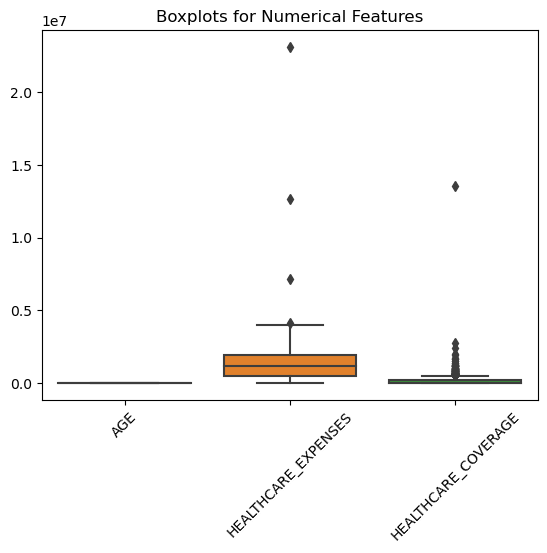

In [102]:
sns.boxplot(data=patients_df[['AGE', 'HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE']])
plt.xticks(rotation=45)
plt.title('Boxplots for Numerical Features')
plt.show()

In [105]:
patients_df['LOG_EXPENSES'] = np.log1p(patients_df['HEALTHCARE_EXPENSES'])
patients_df['LOG_COVERAGE'] = np.log1p(patients_df['HEALTHCARE_COVERAGE'])

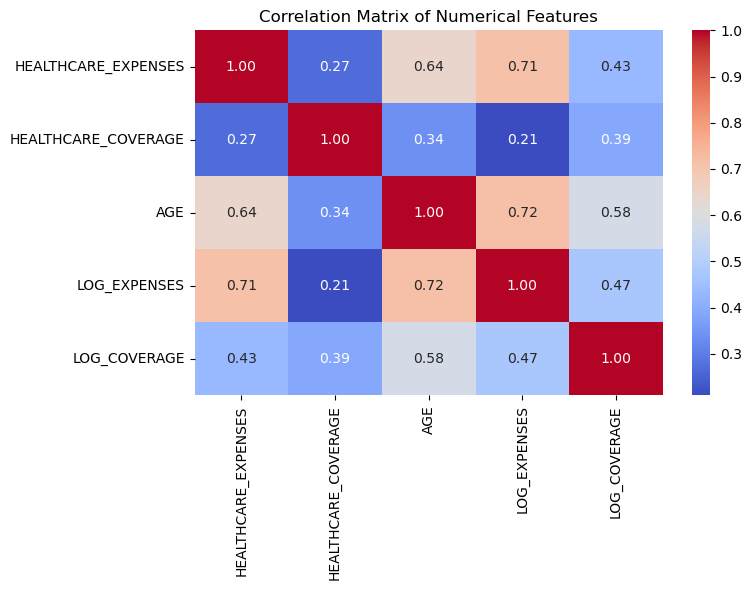

In [106]:
numeric_df = patients_df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

In [110]:
patients_df = patients_df.drop(columns=['HEALTHCARE_EXPENSES', 'HEALTHCARE_COVERAGE'], errors='ignore')

In [113]:
list(patients_df.columns.values)

['Id', 'RACE', 'GENDER', 'ETHNICITY', 'AGE', 'LOG_EXPENSES', 'LOG_COVERAGE']

### Merging Datasets

In [114]:
obs_patients = observations_df.merge(
    patients_df,
    left_on='PATIENT',
    right_on='Id',
    how='left'
)

In [115]:
final_df = obs_patients.merge(
    conditions_df,
    on='PATIENT',
    how='left',
    suffixes=('_obs', '_cond')
)

In [116]:
list(final_df.columns.values)

['PATIENT',
 'DESCRIPTION_obs',
 'VALUE',
 'TYPE',
 'CATEGORY',
 'Id',
 'RACE',
 'GENDER',
 'ETHNICITY',
 'AGE',
 'LOG_EXPENSES',
 'LOG_COVERAGE',
 'DESCRIPTION_cond',
 'START']